In [2]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [3]:
from gensim import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE

import seaborn as sns
import plotly.express as px


from word_embedding.distance_wmd import *
import doc_embedding.moyenne as moyenne
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(font_scale=2)  # crazy big

In [4]:
df_hdbscan_clustering = pd.read_csv("data/tuning/clustering/hdbscan.csv",sep=";")
df_hdbscan_clustering["clustering"] = "hdbscan"
df_hdbscan_clustering["K"]  = df_hdbscan_clustering["K"] - 1
df_kmeans_clustering = pd.read_csv("data/tuning/clustering/kmeans.csv",sep=";")
df_gmm_clustering = pd.read_csv("data/tuning/clustering/gmm.csv",sep=";")
df_gmm_clustering["clustering"] = "gmm"
df_clustering = pd.concat([df_hdbscan_clustering,df_kmeans_clustering,df_gmm_clustering])
df_clustering = df_clustering[(df_clustering["K"] >= 5) & (df_clustering["K"] <= 20)]

df_clustering["silhouette-DBCV"] = df_clustering[["silhouette","DBCV"]].apply(np.mean,axis=1)
df_clustering["DocEmbedding"] = df_clustering["docEmbedding"] +" - " + df_clustering["docEmbedding2"]
df_clustering = df_clustering.sort_values("DocEmbedding").reset_index()
df_clustering.head()

index  voisinage  min_cluster_size   distance   K  silhouette  \
0    169        NaN               NaN        NaN  11    0.347343   
1  15576       19.0             100.0  euclidean   6   -0.059911   
2  15579       14.0             150.0  euclidean   5    0.008991   
3  15581       17.0              14.0  euclidean  20   -0.204722   
4  15587       20.0             100.0  euclidean   6   -0.061481   

   Cal-Harabasz      DBCV  non_classes  perplexity  ... docEmbedding2  \
0  12411.573947 -0.634164          NaN       100.0  ...            TF   
1    650.651622 -0.307294       2574.0       200.0  ...            TF   
2    735.245424 -0.310467       2674.0       200.0  ...            TF   
3    286.311302 -0.313508       2400.0       200.0  ...            TF   
4    651.489186 -0.326792       2402.0       200.0  ...            TF   

  clustering initialisation nb_iter tolerance  val_obj  covariance  \
0        gmm            NaN     NaN       NaN      NaN        diag   
1    hdbscan            NaN     NaN       NaN      NaN         NaN   
2    hdbscan            NaN     NaN       NaN      NaN         NaN   
3    hdbscan            NaN     NaN       NaN      NaN         NaN   
4    hdbscan            NaN     NaN       NaN      NaN         NaN   

             BIC silhouette-DBCV  DocEmbedding  
0  169041.858173       -0.143411  Moyenne - TF  
1            NaN       -0.183603  Moyenne - TF  
2            NaN       -0.150738  Moyenne - TF  
3            NaN       -0.259115  Moyenne - TF  
4            NaN       -0.194136  Moyenne - TF  

[5 rows x 22 columns]

# Scatter plot

In [5]:
with open("data/tuning/clustering/best_labels.json") as file:
    best_labels_clust = json.load(file)

############################################################################################################################
                                                  SILHOUETTE                                                                         
############################################################################################################################


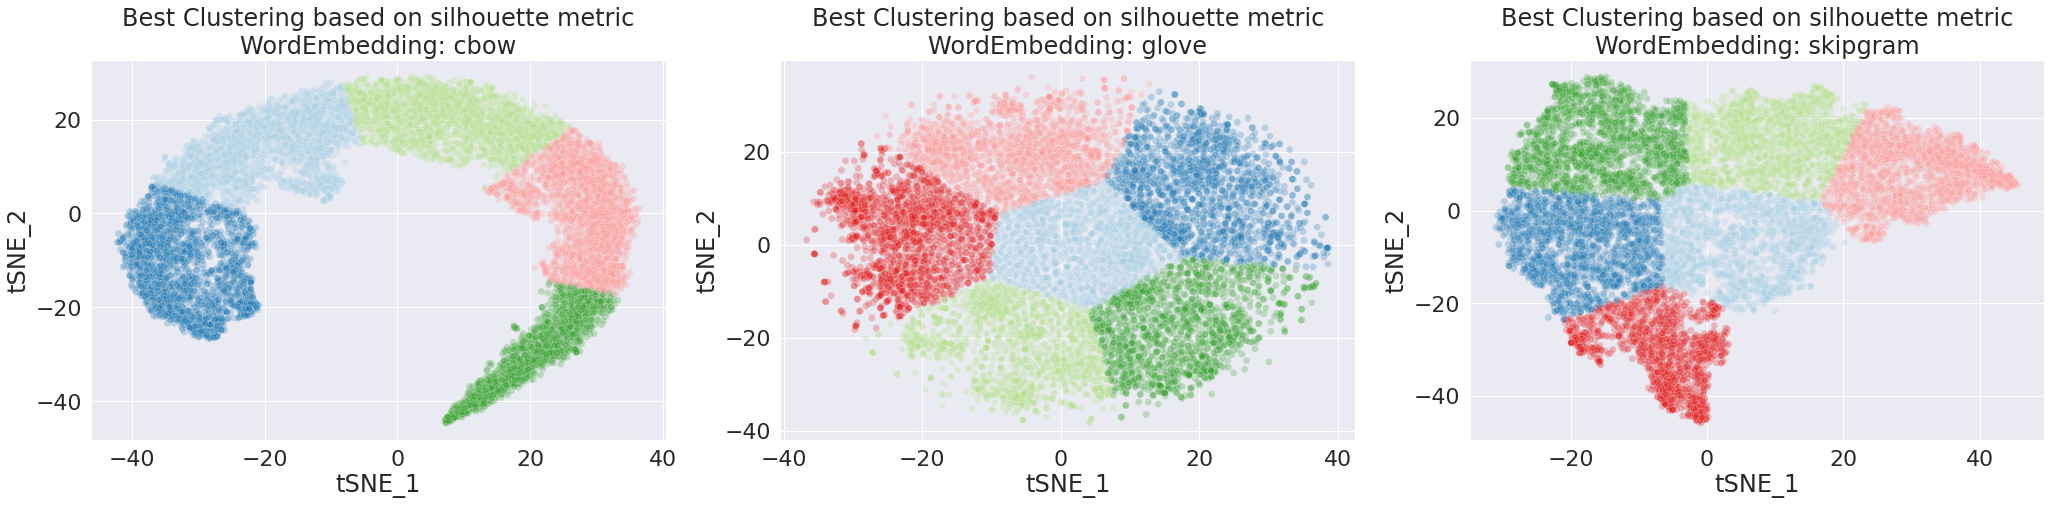

############################################################################################################################
                                                  CAL-HARABASZ                                                                         
############################################################################################################################


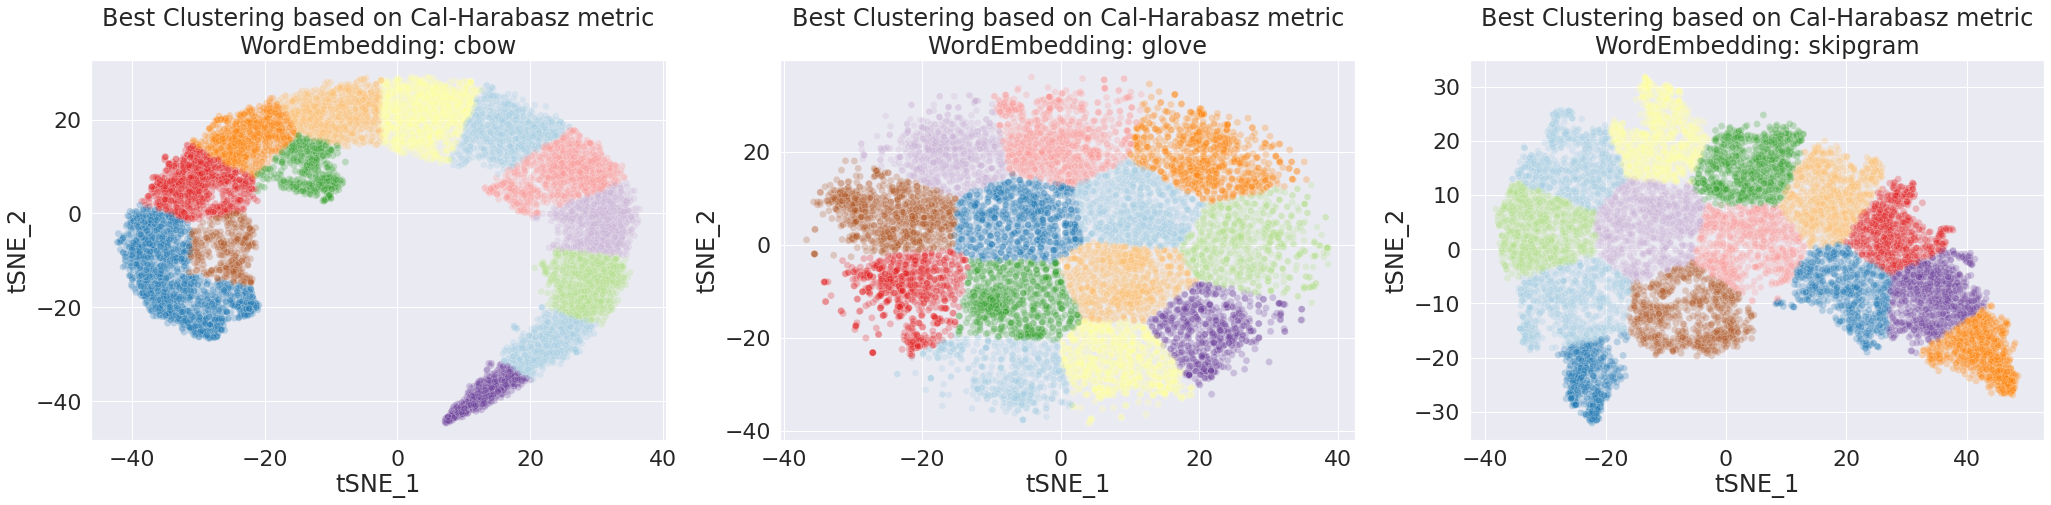

############################################################################################################################
                                                  DBCV                                                                         
############################################################################################################################


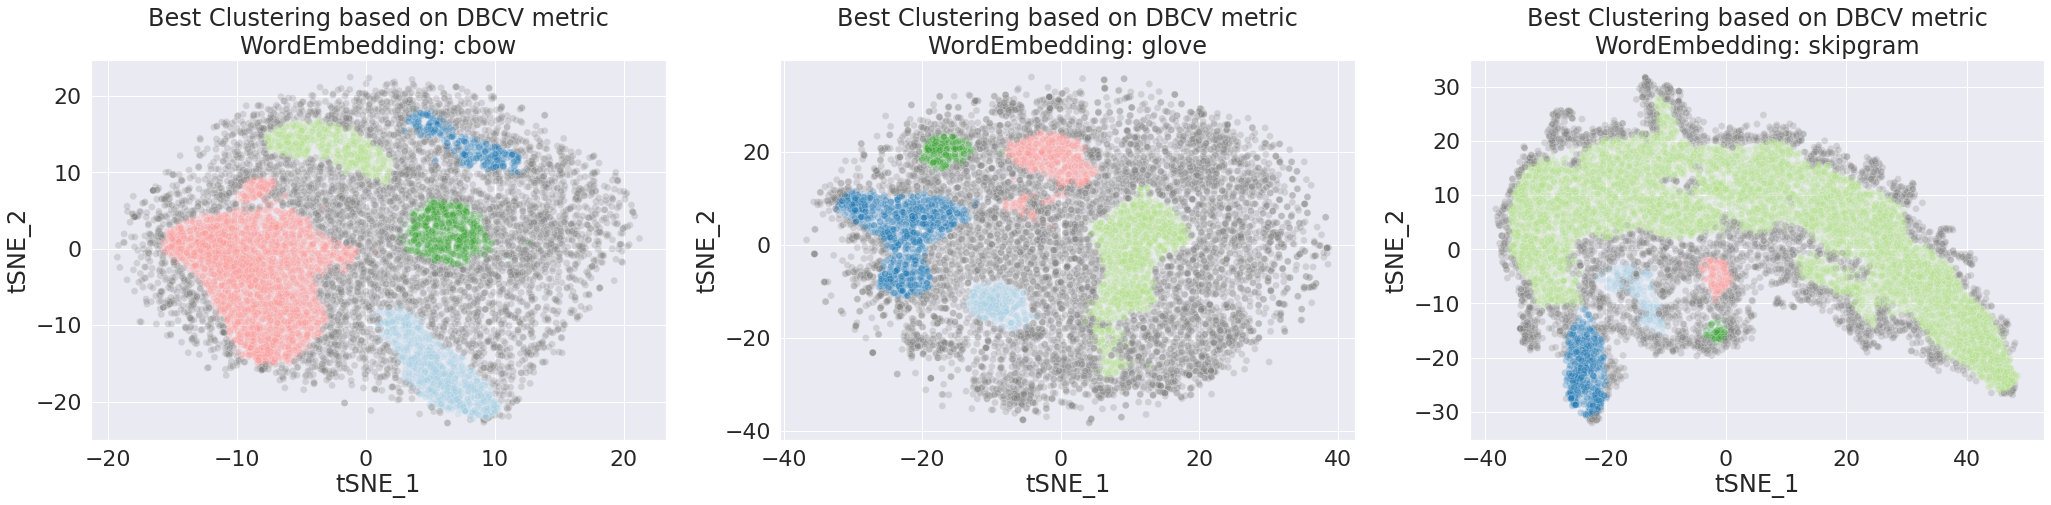

In [6]:
best_labels = best_labels_clust['ReductionFirst']
for metrique in ["silhouette","Cal-Harabasz","DBCV"]:
    print("############################################################################################################################")
    print(f"                                                  {metrique.upper()}                                                                         ")
    print("############################################################################################################################")

    i=0
    plt.figure(figsize = (35,7))
    for modele in ["cbow","glove","skipgram"]:
        labels = best_labels[modele][metrique]["labels"]
        embedding = np.array(pd.read_csv(f"data/tuning/clustering/bestmodel/{best_labels[modele][metrique]['datafilename']}",sep=";"))

        color_palette = sns.color_palette('Paired', len(np.unique(labels)))
        cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels]

        title = f"Best Clustering based on {metrique} metric"
        subtitle1 = f"WordEmbedding: {modele}" 
        title=f"{title}\n{subtitle1}"

        sns.scatterplot(embedding[:,0],embedding[:,1], s=50, c=cluster_colors, alpha=0.25,ax=plt.subplot(1,3,i+1,title=title,xlabel="tSNE_1",ylabel="tSNE_2"))
        i+=1

    plt.show()

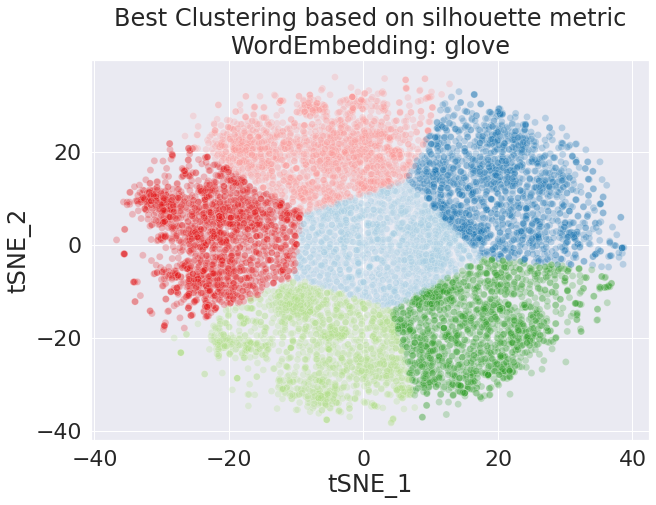

In [7]:
modele = "glove"
metrique = "silhouette"
best_labels = best_labels_clust['ReductionFirst']
labels = best_labels[modele][metrique]["labels"]
embedding = np.array(pd.read_csv(f"data/tuning/clustering/bestmodel/{best_labels[modele][metrique]['datafilename']}",sep=";"))

color_palette = sns.color_palette('Paired', len(np.unique(labels)))
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels]

title = f"Best Clustering based on {metrique} metric"
subtitle1 = f"WordEmbedding: {modele}" 
title=f"{title}\n{subtitle1}"

plt.figure(figsize = (10,7))
sns.scatterplot(embedding[:,0],embedding[:,1], s=50, c=cluster_colors, alpha=0.25,ax=plt.subplot(1,1,1,title=title,xlabel="tSNE_1",ylabel="tSNE_2"))
plt.show()



In [8]:
from scipy.spatial import ConvexHull
# Get convex hulls for each cluster
hulls = {}
for i in np.unique(labels):
    hull = ConvexHull(embedding[np.where(labels==i),])
    hulls[i] = hull
hull

############################################################################################################################
                                                  SILHOUETTE                                                                         
############################################################################################################################


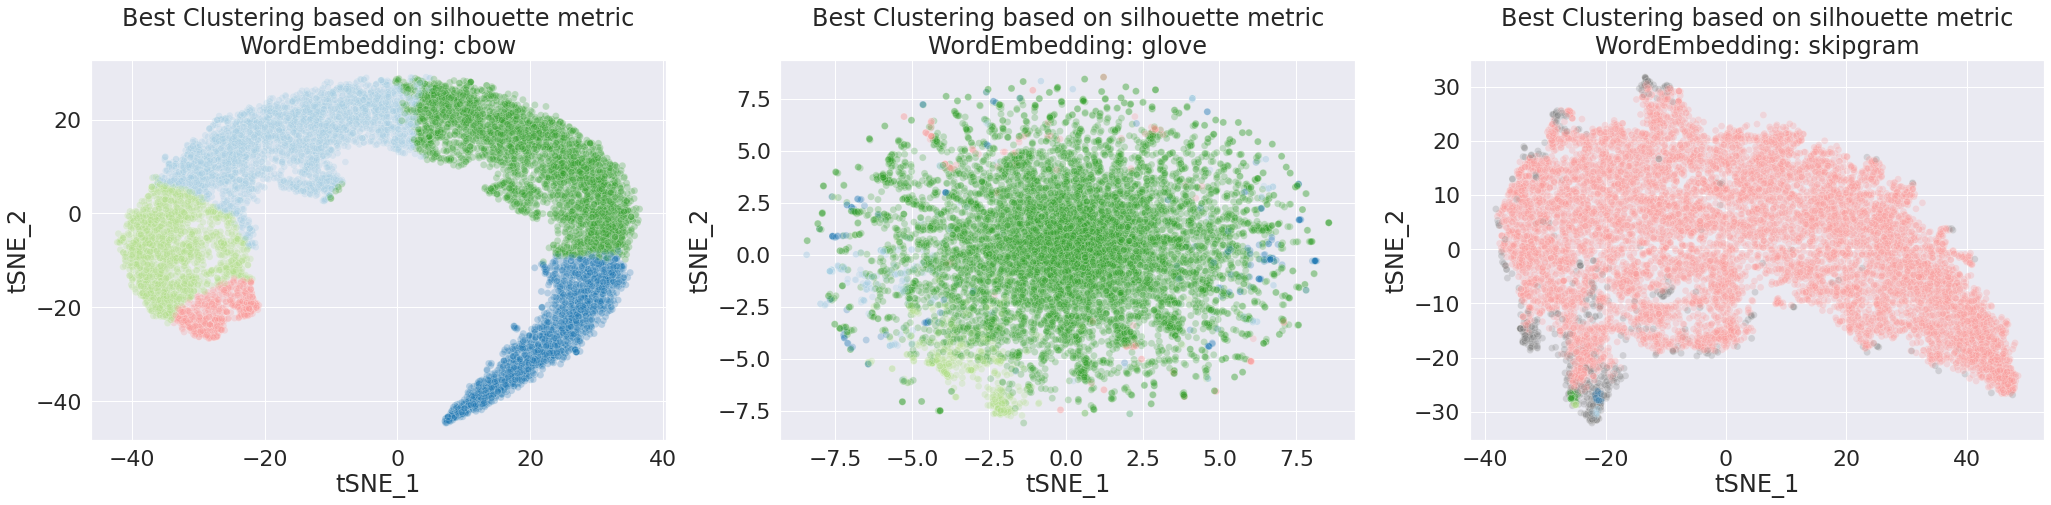

############################################################################################################################
                                                  CAL-HARABASZ                                                                         
############################################################################################################################


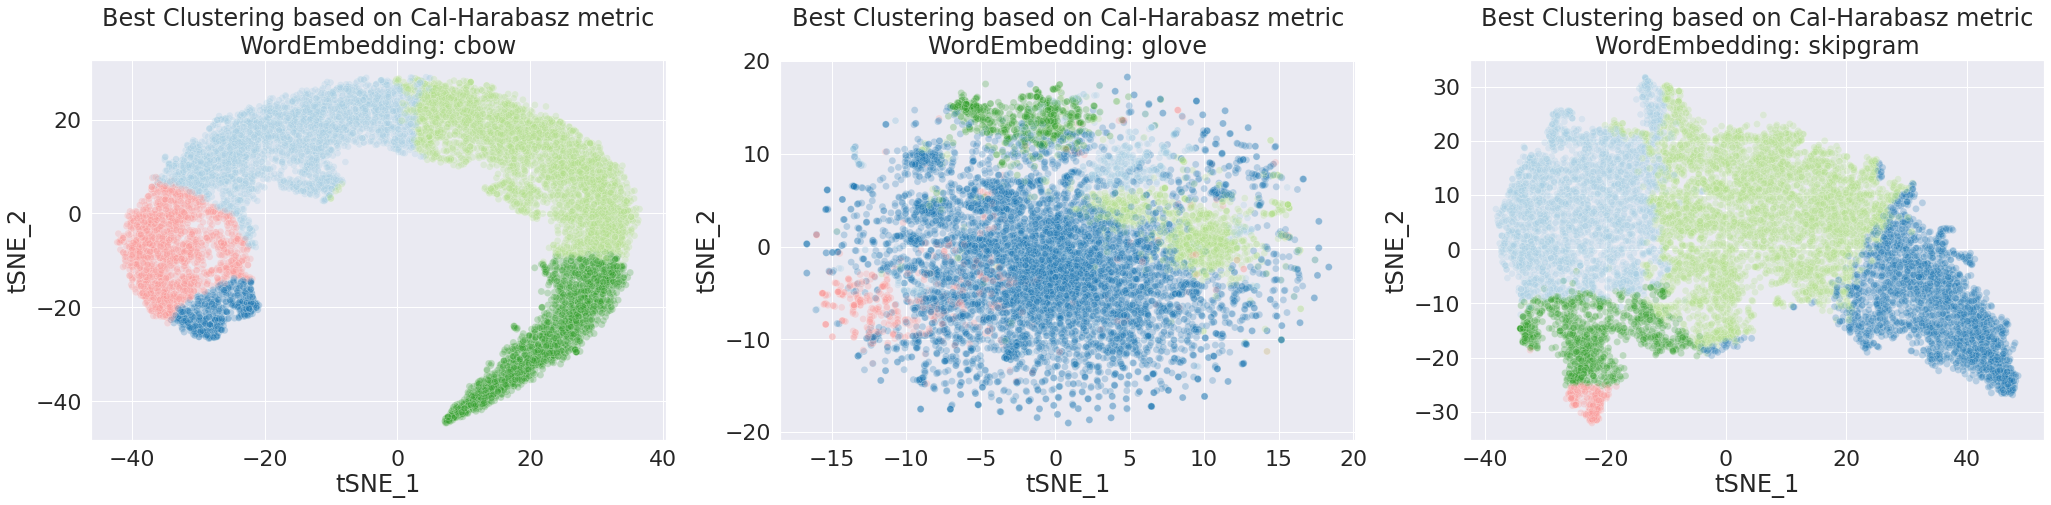

############################################################################################################################
                                                  DBCV                                                                         
############################################################################################################################


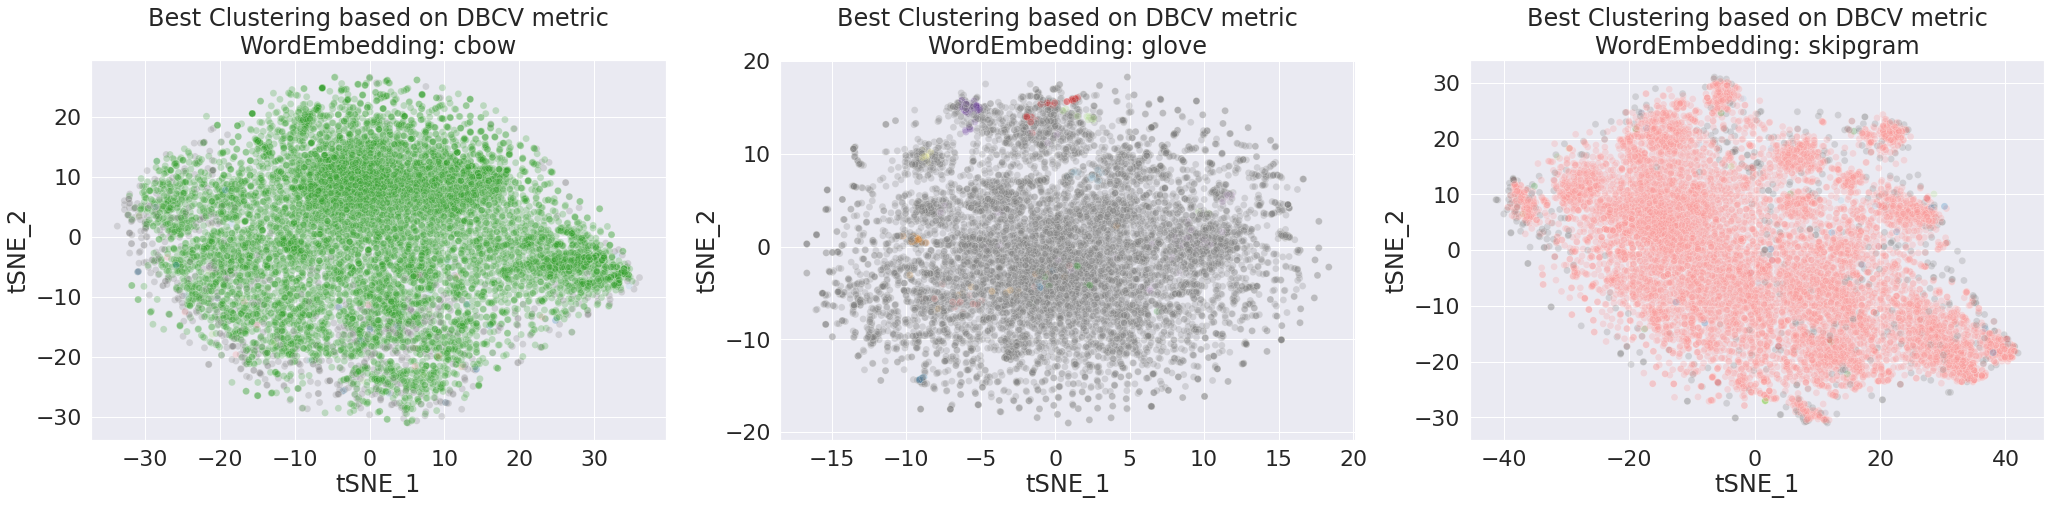

In [7]:
best_labels = best_labels_clust['ReductionAfter']
for metrique in ["silhouette","Cal-Harabasz","DBCV"]:
    print("############################################################################################################################")
    print(f"                                                  {metrique.upper()}                                                                         ")
    print("############################################################################################################################")

    i=0
    plt.figure(figsize = (35,7))
    for modele in ["cbow","glove","skipgram"]:
        labels = best_labels[modele][metrique]["labels"]
        embedding = np.array(pd.read_csv(f"data/tuning/clustering/bestmodel/{best_labels[modele][metrique]['datafilename']}",sep=";"))

        color_palette = sns.color_palette('Paired', len(np.unique(labels)))
        cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels]

        title = f"Best Clustering based on {metrique} metric"
        subtitle1 = f"WordEmbedding: {modele}" 
        title=f"{title}\n{subtitle1}"

        sns.scatterplot(embedding[:,0],embedding[:,1], s=50, c=cluster_colors, alpha=0.25,ax=plt.subplot(1,3,i+1,title=title,xlabel="tSNE_1",ylabel="tSNE_2"))
        i+=1

    plt.show()